# EDA

In [ ]:
# =======================================
#  Google Colab - Data Validation & EDA
# =======================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

# ========== [LOAD DATA] ==========
# df = pd.read_csv("/content/training-data.csv")
df = pd.read_csv("/content/training-data-1000.csv")
df_real = pd.read_csv("/content/real-data.csv")

# Correlation of Personal Attributes of Real Data

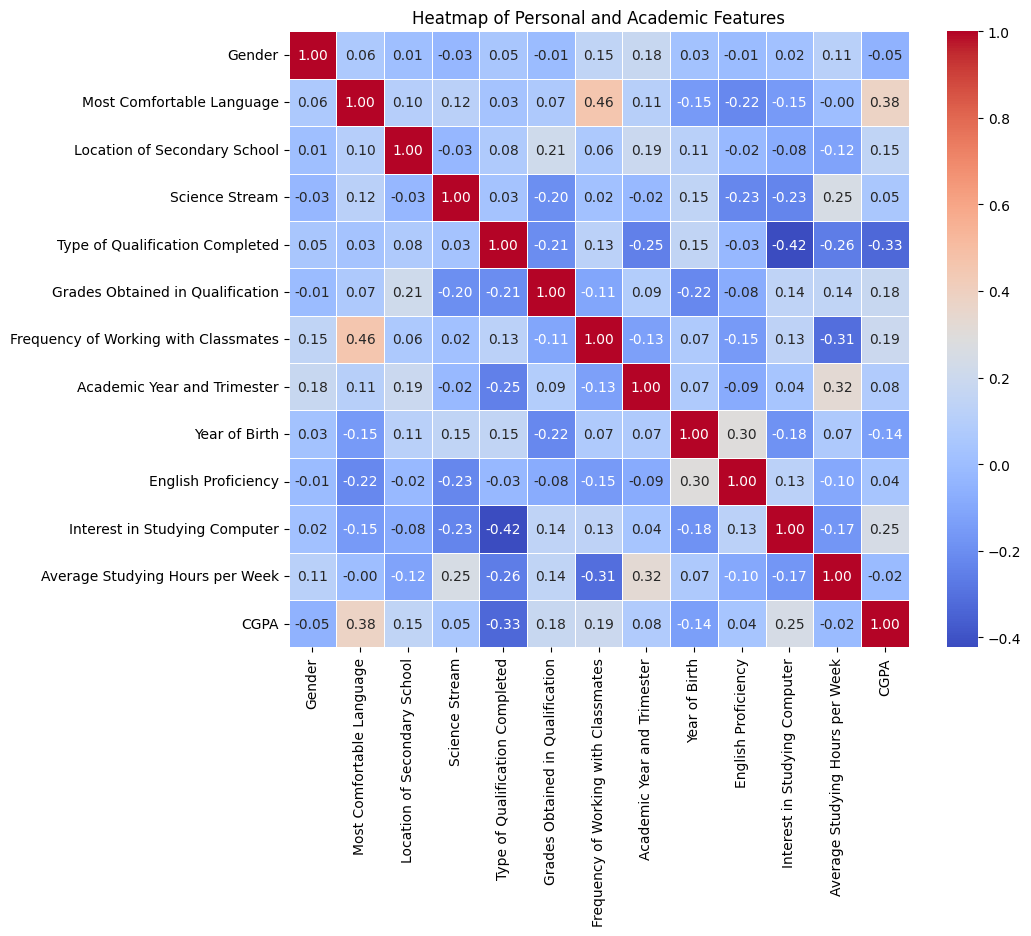

In [ ]:
# Define lists of numeric and categorical variables
numeric_columns = [
    "Year of Birth", "English Proficiency", "Interest in Studying Computer",
    "Average Studying Hours per Week", "CGPA"]

categorical_columns = [
    "Gender", "Most Comfortable Language", "Location of Secondary School",
    "Science Stream", "Type of Qualification Completed", "Grades Obtained in Qualification",
    "Frequency of Working with Classmates", "Academic Year and Trimester"]

# Step 1: Encode Categorical Variables using Label Encoding
df_encoded = df_real.copy()
label_encoders = {}  # Dictionary to store encoders

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))  # Convert to numerical values
    label_encoders[col] = le  # Store the encoder for potential inverse transformation

# Step 2: Scale the Data
scaler = StandardScaler()
df_encoded[categorical_columns + numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns + categorical_columns])

# Step 3: Compute Correlation Matrix
corr_matrix = df_encoded[categorical_columns + numeric_columns].corr(method='pearson')

# Step 4: Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Personal and Academic Features")
plt.show()

# Correlation of Subjects Grades of Real Data

In [ ]:
null_counts = df_real.isnull().sum()
print("Number of null values per attribute:")
print(null_counts)

Number of null values per attribute:
Gender                                                     0
Year of Birth                                              0
Most Comfortable Language                                  0
English Proficiency                                        0
Location of Secondary School                               0
Science Stream                                             0
Type of Qualification Completed                            0
Grades Obtained in Qualification                           0
Frequency of Working with Classmates                       0
Interest in Studying Computer                              0
Average Studying Hours per Week                            0
Academic Year and Trimester                                0
CGPA                                                       0
PROGRAMMING AND PROBLEM SOLVING                            0
SOFTWARE AND REQUIREMENTS                                  6
TCP/IP NETWORK FUNDAMENTALS                     

In [ ]:
subjects = ["PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS", "TCP/IP NETWORK FUNDAMENTALS",
            "PROBABILITY AND STATISTICS FOR COMPUTING", "OBJECT-ORIENTED APPLICATION DEVELOPMENT",
            "DATABASE SYSTEM FUNDAMENTALS", "WEB APPLICATION DEVELOPMENT", "SOFTWARE DESIGN", "SOFTWARE TESTING",
            "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE",
            "HUMAN COMPUTER INTERACTION DESIGN", "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS"]

df_subjects = df_real[subjects]

# Convert grades to numeric (e.g., A=4, B=3, C=2, D=1, F=0)
grade_mapping = {'A': 3, 'B': 2, 'C': 1, 'F': 0}
df_numeric = df_subjects.map(lambda x: grade_mapping.get(x, None))

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_subjects.columns)

# Convert back to letter grades
reverse_mapping = {v: k for k, v in grade_mapping.items()}
df_subjects = df_imputed.map(lambda x: reverse_mapping.get(round(x), 'C'))  # Default to 'C' if rounding error

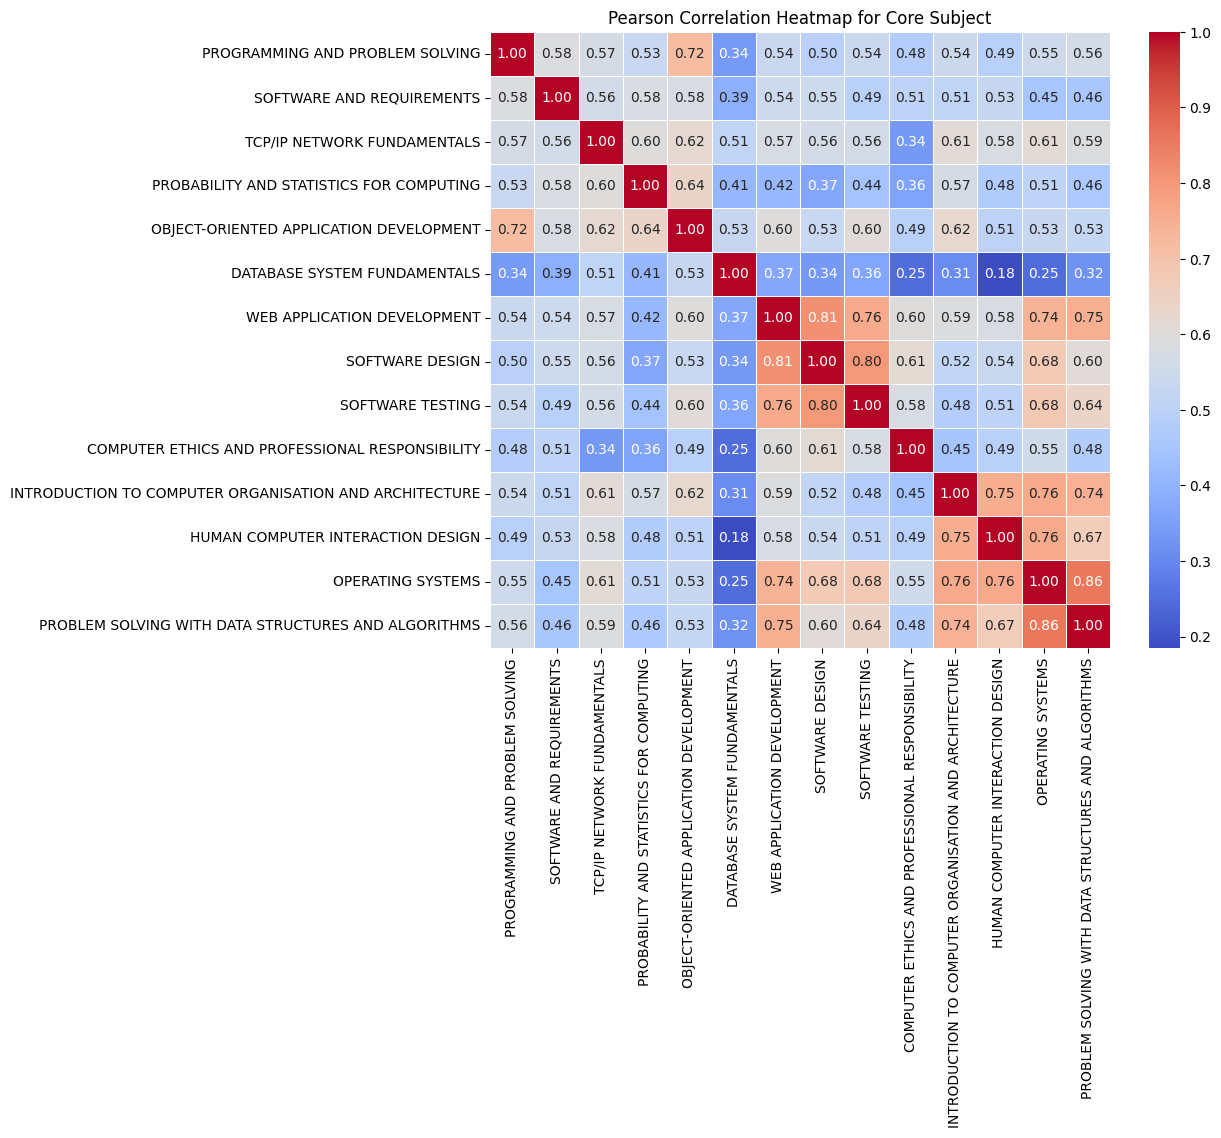

In [ ]:
subjects = ["PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS", "TCP/IP NETWORK FUNDAMENTALS",
            "PROBABILITY AND STATISTICS FOR COMPUTING", "OBJECT-ORIENTED APPLICATION DEVELOPMENT",
            "DATABASE SYSTEM FUNDAMENTALS", "WEB APPLICATION DEVELOPMENT", "SOFTWARE DESIGN", "SOFTWARE TESTING",
            "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE",
            "HUMAN COMPUTER INTERACTION DESIGN", "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS"]

df_subjects = df_real[subjects]
df_not_imputed = df_subjects.dropna()

# Step 1: Encode Categorical Data
df_encoded = df_subjects[subjects].copy()

# Use Label Encoding for all categorical columns
categorical_columns = df_encoded.select_dtypes(include=['object']).columns  # Select categorical columns
for col in categorical_columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes  # Convert to numerical codes

# Step 2: Compute Pearson Correlation
corr_matrix = df_encoded.corr(method='pearson')  # Compute correlation

# Step 3: Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap for Core Subject")
plt.show()

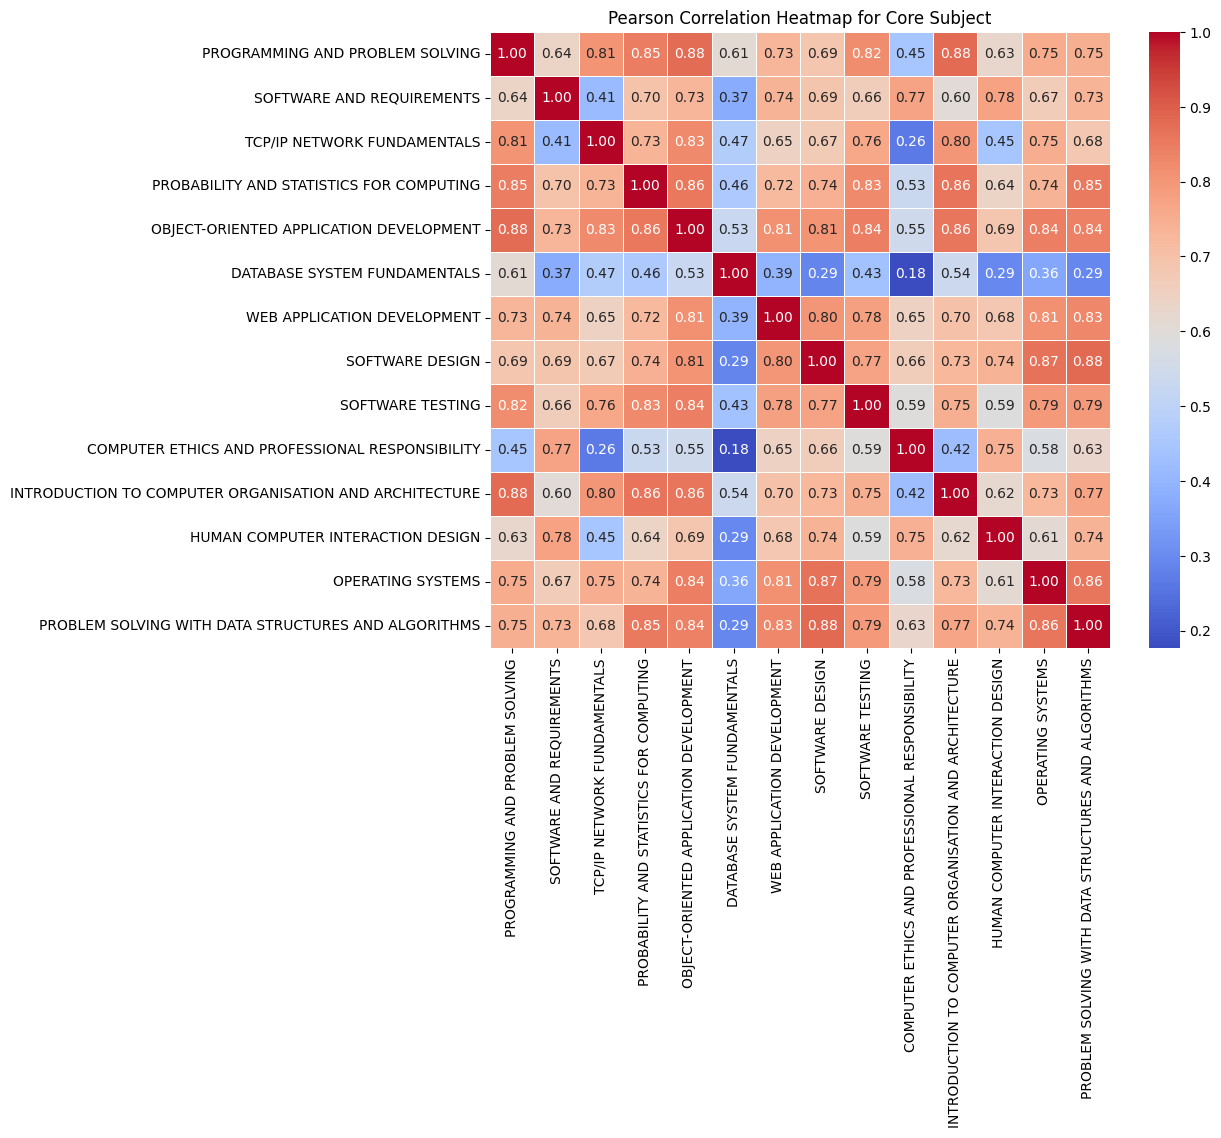

In [ ]:
# Step 1: Encode Categorical Data
df_encoded = df_subjects[subjects].copy()

# Use Label Encoding for all categorical columns
categorical_columns = df_encoded.select_dtypes(include=['object']).columns  # Select categorical columns
for col in categorical_columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes  # Convert to numerical codes

# Step 2: Compute Pearson Correlation
corr_matrix = df_encoded.corr(method='pearson')  # Compute correlation

# Step 3: Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap for Core Subject")
plt.show()

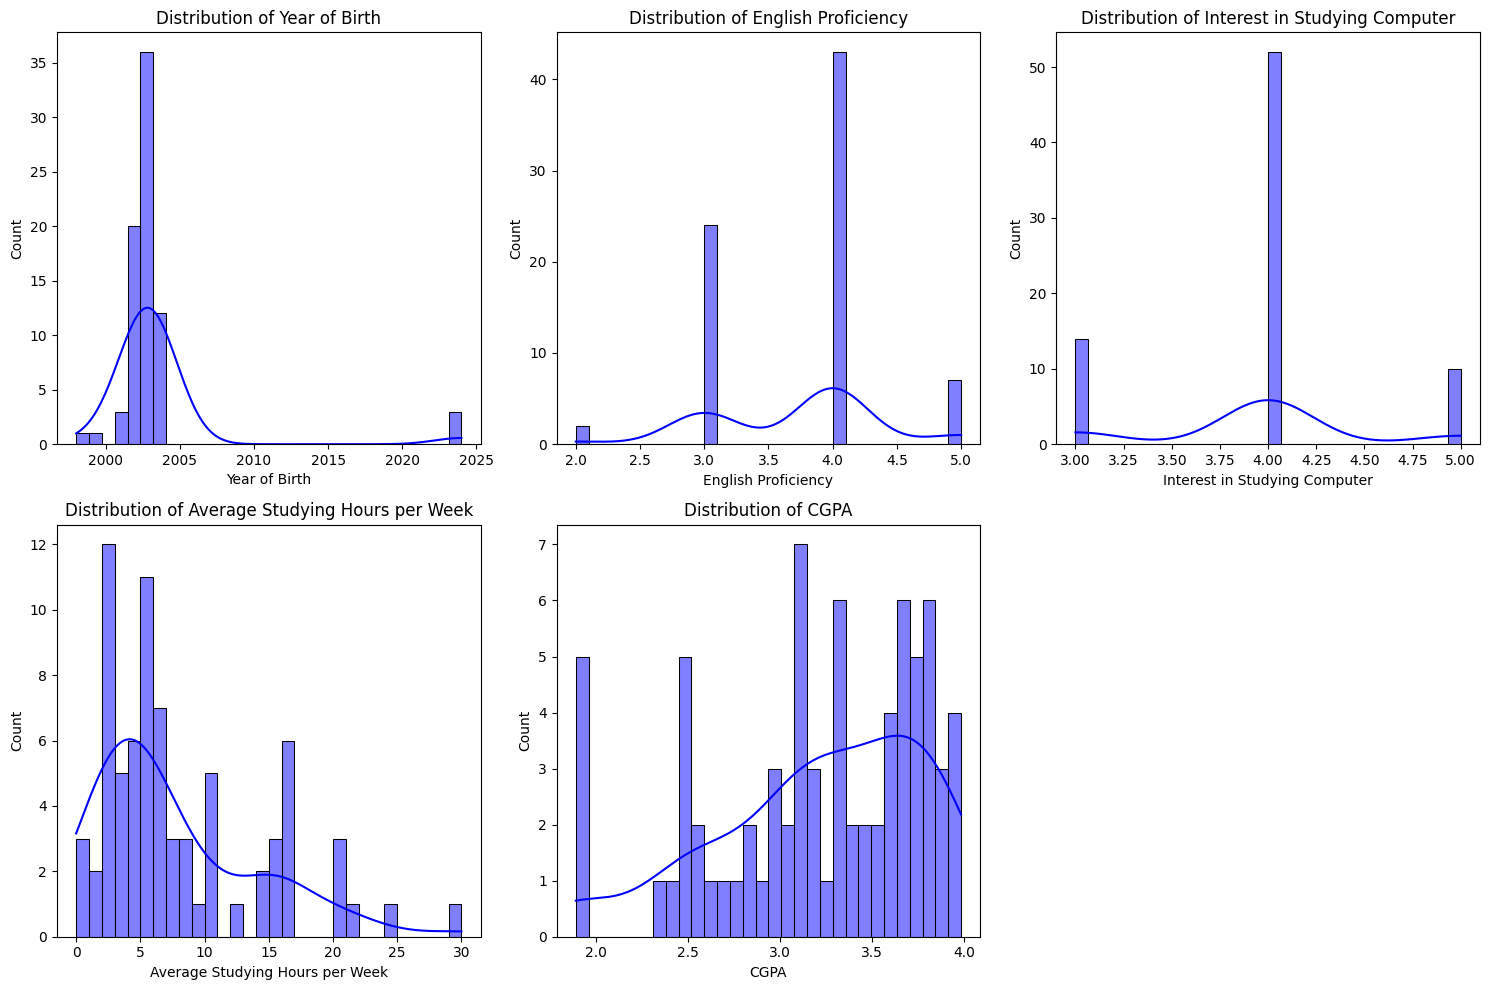

In [ ]:
# Plot Histograms and KDE for Numeric Columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)  # Adjust grid size as needed
    sns.histplot(df_real[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

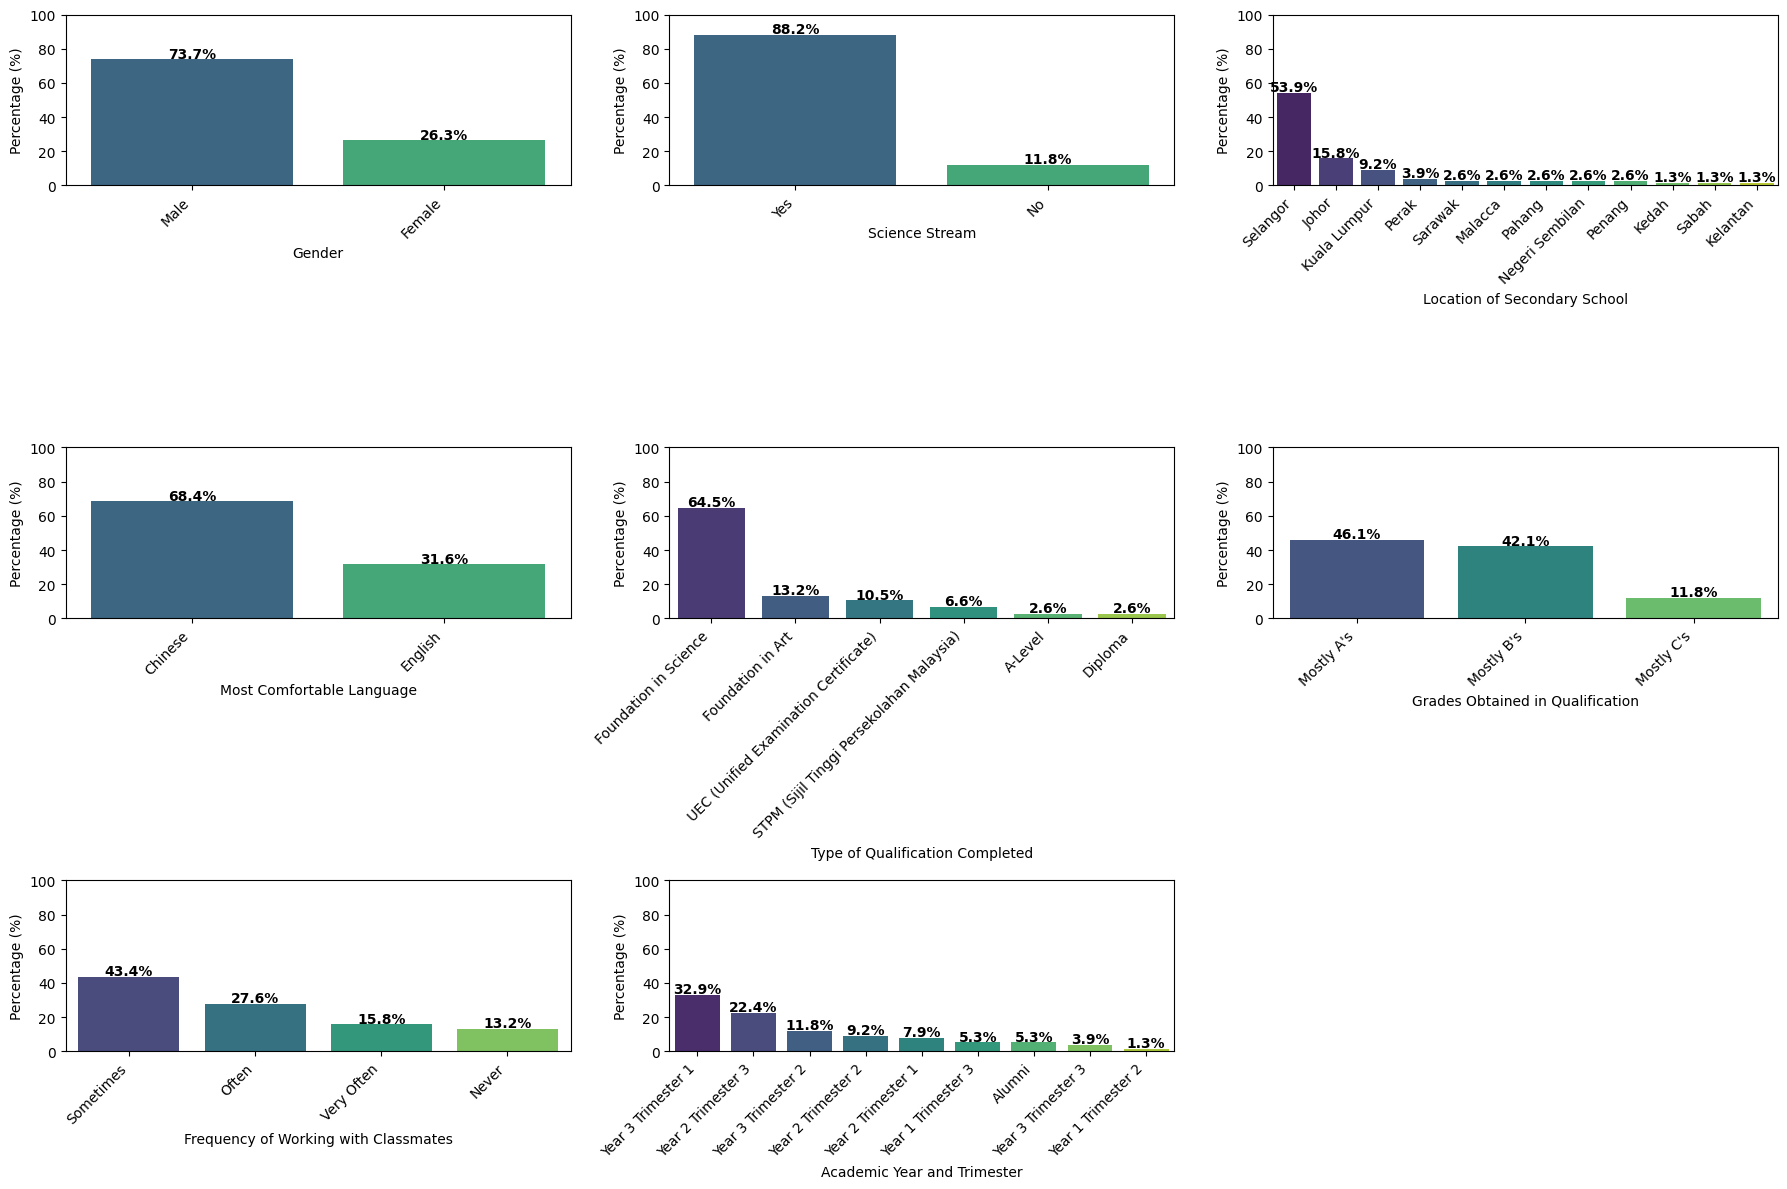

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define relevant categorical columns
categorical_columns = [
    "Gender", "Science Stream", "Location of Secondary School",
    "Most Comfortable Language", "Type of Qualification Completed",
    "Grades Obtained in Qualification", "Frequency of Working with Classmates",
    "Academic Year and Trimester"
]

# Create a grid layout for bar charts
num_cols = 3  # Number of columns per row
num_rows = -(-len(categorical_columns) // num_cols)  # Compute required rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through selected subjects and plot bar charts
for i, col in enumerate(categorical_columns):
    # Compute value counts as percentages
    value_counts = df_real[col].value_counts(normalize=True) * 100  # Convert to percentage

    # Plot bar chart
    ax = axes[i]
    sns.barplot(
        x=value_counts.index,
        y=value_counts.values,
        ax=ax,
        hue=value_counts.index,
        palette="viridis",
        legend=False
    )

    # Ensure proper tick positions before setting labels
    ax.set_xticks(range(len(value_counts.index)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha="right")  # Fix warning

    # Set y-axis to display percentage
    ax.set_ylabel("Percentage (%)")
    ax.set_ylim(0, 100)  # Ensure the y-axis goes from 0% to 100%

    # Annotate bars with percentage values
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # X position (center of bar)
            p.get_height() + 1,  # Y position (slightly above the bar)
            f"{p.get_height():.1f}%",  # Format as 1 decimal place percentage
            ha="center",  # Center align
            fontsize=10,  # Font size
            fontweight="bold",
            color="black"
        )

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

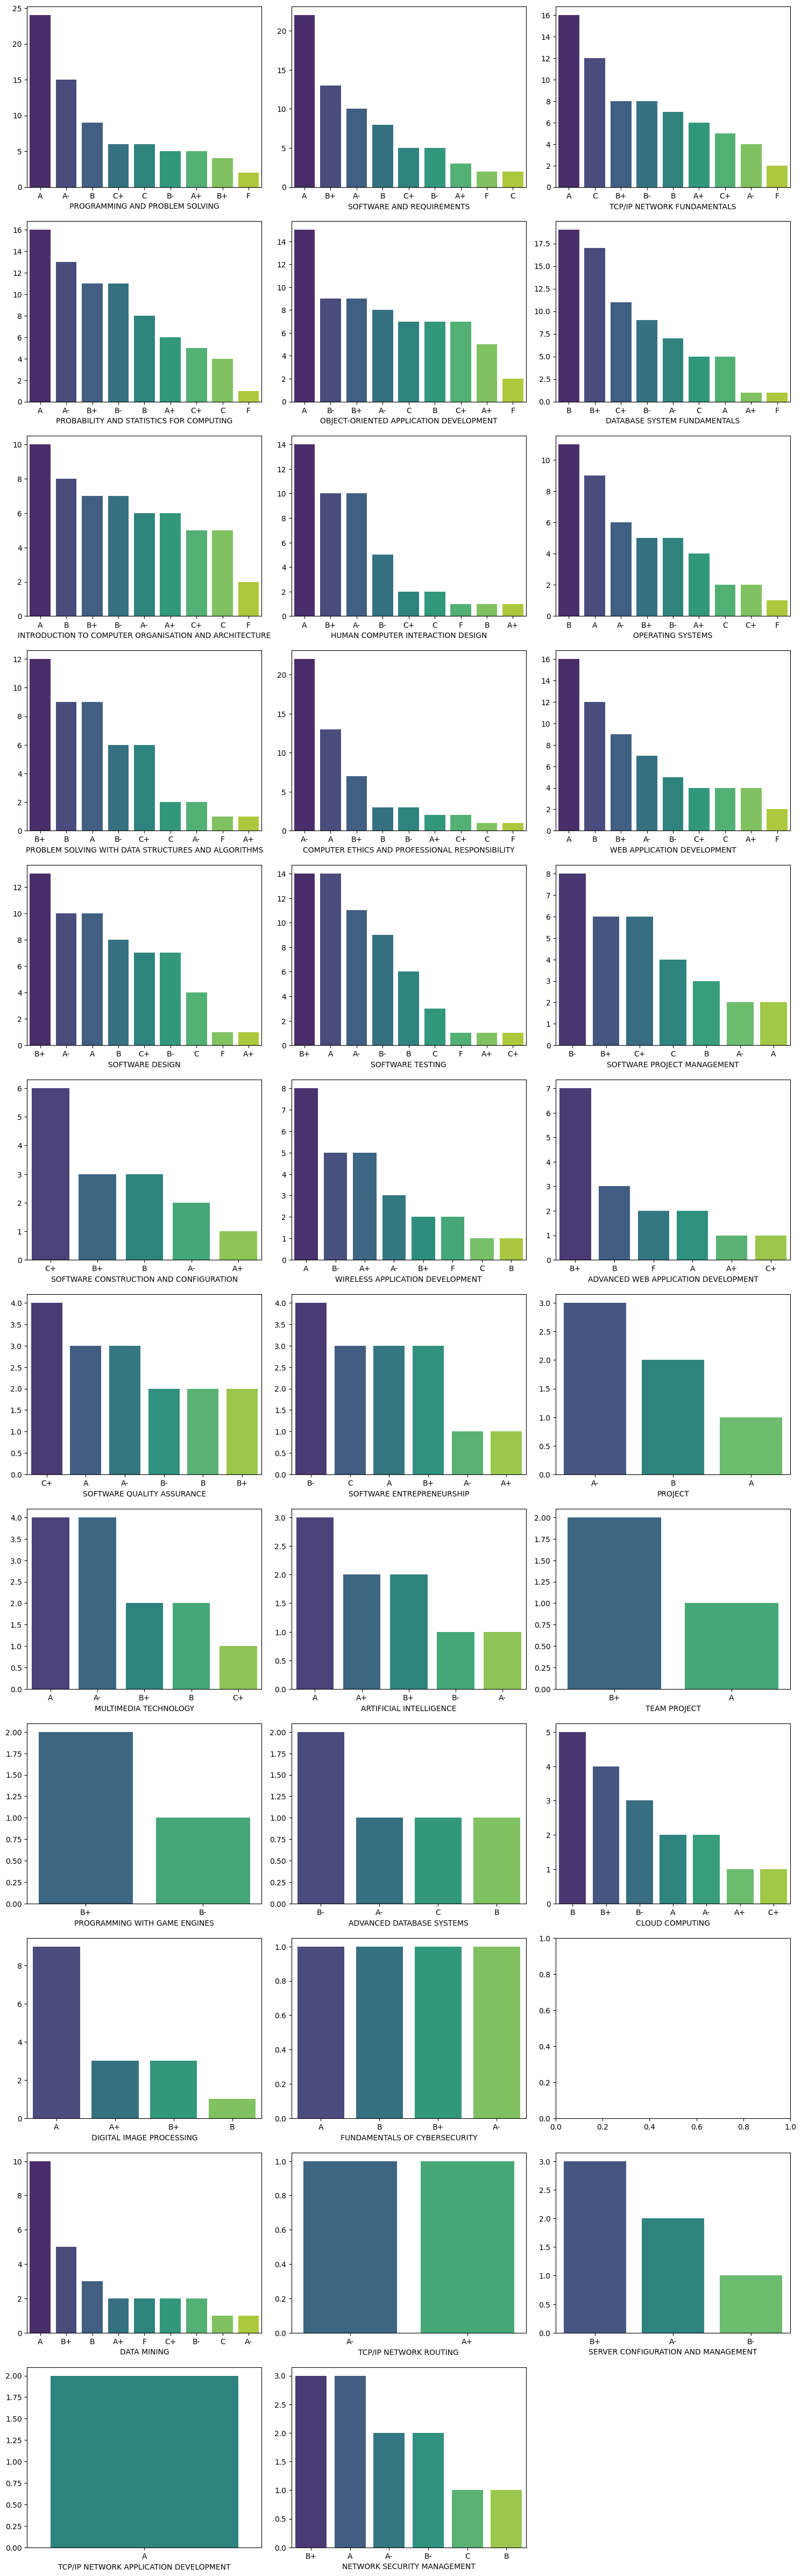

In [ ]:
# List of subjects
subjects = [
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT",
    "SOFTWARE CONSTRUCTION AND CONFIGURATION", "WIRELESS APPLICATION DEVELOPMENT",
    "ADVANCED WEB APPLICATION DEVELOPMENT", "SOFTWARE QUALITY ASSURANCE",
    "SOFTWARE ENTREPRENEURSHIP", "PROJECT", "MULTIMEDIA TECHNOLOGY",
    "ARTIFICIAL INTELLIGENCE", "TEAM PROJECT", "PROGRAMMING WITH GAME ENGINES",
    "ADVANCED DATABASE SYSTEMS", "CLOUD COMPUTING", "DIGITAL IMAGE PROCESSING",
    "FUNDAMENTALS OF CYBERSECURITY", "PARALLEL PROCESSING", "DATA MINING",
    "TCP/IP NETWORK ROUTING", "SERVER CONFIGURATION AND MANAGEMENT",
    "TCP/IP NETWORK APPLICATION DEVELOPMENT", "NETWORK SECURITY MANAGEMENT"
]

# Create a grid layout for bar charts
num_cols = 3  # Number of columns per row
num_rows = -(-len(subjects) // num_cols)  # Compute required rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through selected subjects and plot bar charts
for i, col in enumerate(subjects):
  sns.barplot(
      x=df_real[col].value_counts().index,
      y=df_real[col].value_counts().values,
      ax=axes[i],
      hue=df_real[col].value_counts().index,  # Assign hue to x to avoid the warning
      palette="viridis",
      legend=False  # Disable legend
  )

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Data Overview of Synthetic Data

In [ ]:
data_types = df.dtypes.astype(str)
print("=== Data Overview ===")
print("Dataset Shape:", df.shape)
print("Data Types Summary:")
print(data_types.value_counts())

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

duplicate_count = df.duplicated().sum()
duplicate_info = f"Duplicates Found: {duplicate_count}" if duplicate_count > 0 else "No Duplicates Found"

print("\n=== Data Quality Check ===")
if not missing_values.empty:
    print("Missing Values:")
    print(missing_values)
else:
    print("No Missing Values")

print(duplicate_info)

=== Data Overview ===
Dataset Shape: (1000, 48)
Data Types Summary:
object     43
int64       4
float64     1
Name: count, dtype: int64

=== Data Quality Check ===
No Missing Values
No Duplicates Found


# Data Exploration of Personal Attributes

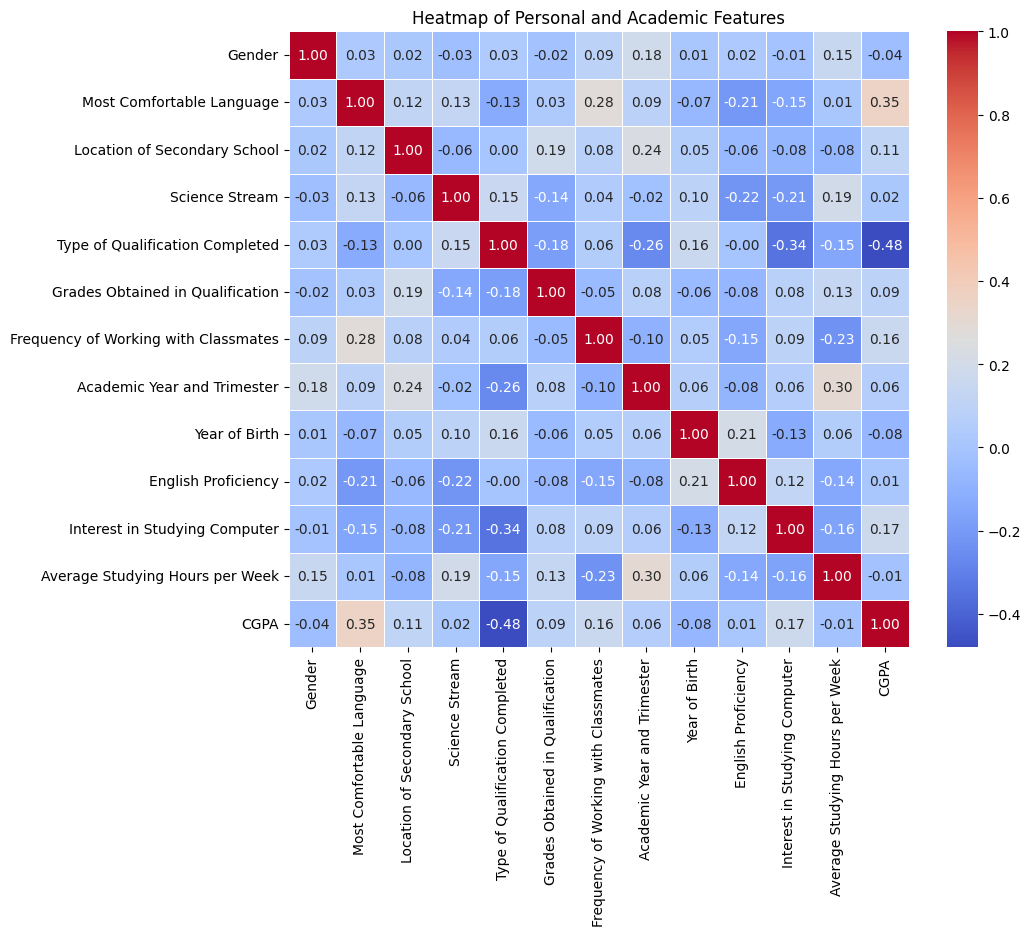

In [ ]:
# Define lists of numeric and categorical variables
numeric_columns = [
    "Year of Birth", "English Proficiency", "Interest in Studying Computer",
    "Average Studying Hours per Week", "CGPA"]

categorical_columns = [
    "Gender", "Most Comfortable Language", "Location of Secondary School",
    "Science Stream", "Type of Qualification Completed", "Grades Obtained in Qualification",
    "Frequency of Working with Classmates", "Academic Year and Trimester"]

# Step 1: Encode Categorical Variables using Label Encoding
df_encoded = df.copy()
label_encoders = {}  # Dictionary to store encoders

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))  # Convert to numerical values
    label_encoders[col] = le  # Store the encoder for potential inverse transformation

# Step 2: Scale the Data
scaler = StandardScaler()
df_encoded[categorical_columns + numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns + categorical_columns])

# Step 3: Compute Correlation Matrix
corr_matrix = df_encoded[categorical_columns + numeric_columns].corr(method='pearson')

# Step 4: Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Personal and Academic Features")
plt.show()

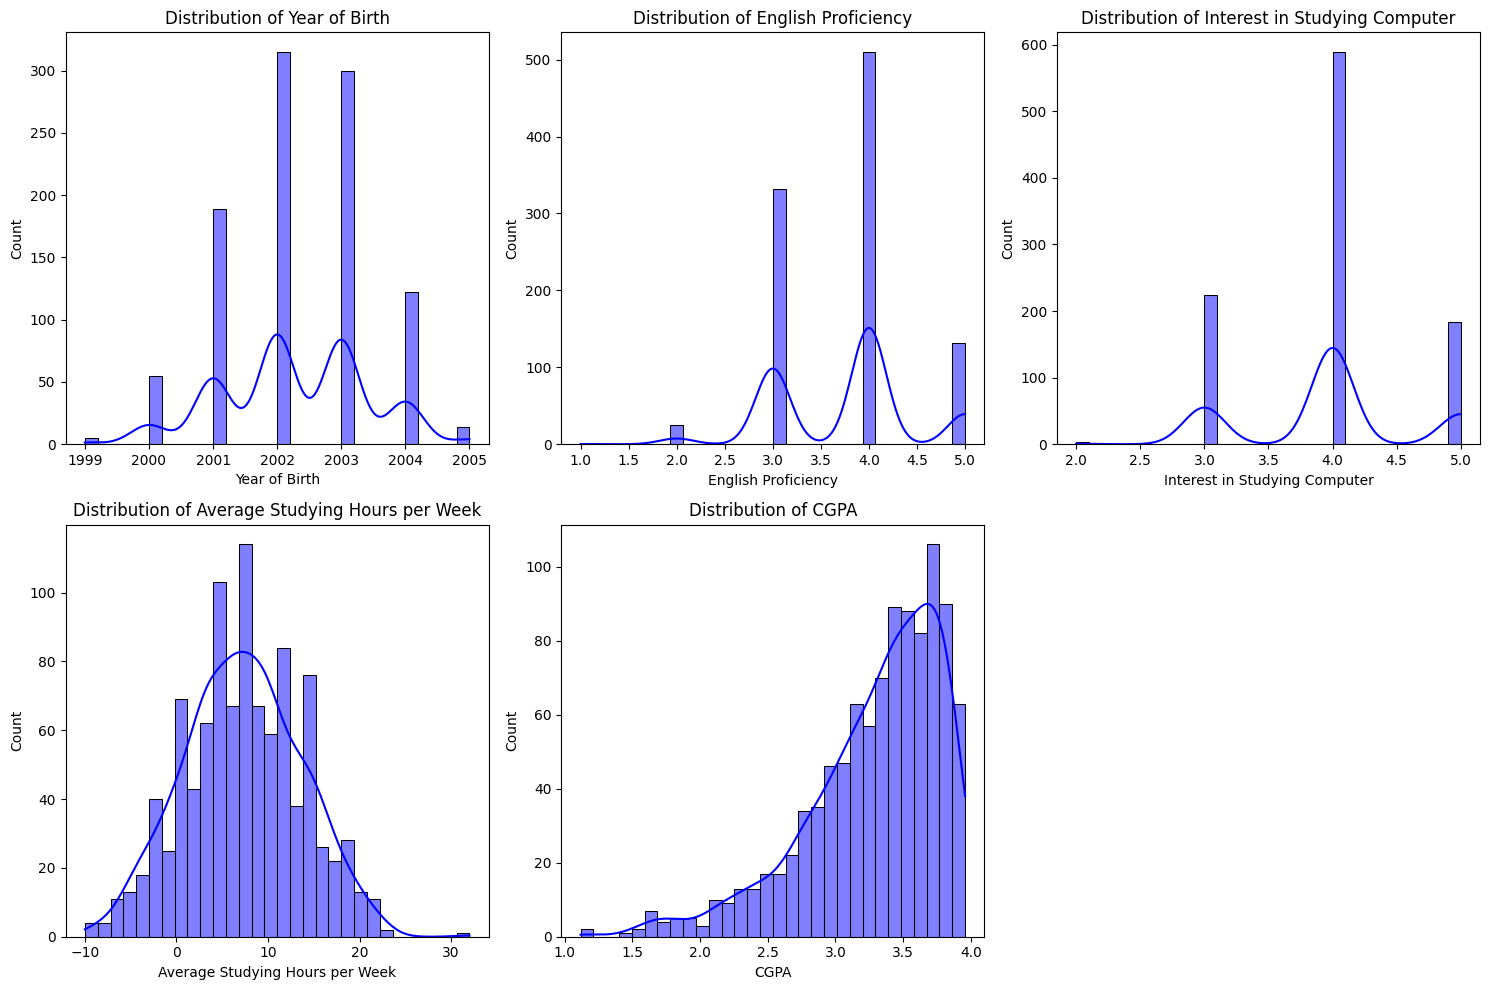

In [ ]:
# Plot Histograms and KDE for Numeric Columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 3, i + 1)  # Adjust grid size as needed
    sns.histplot(df[col], kde=True, bins=30, color="blue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Distribution of Categorical Variables

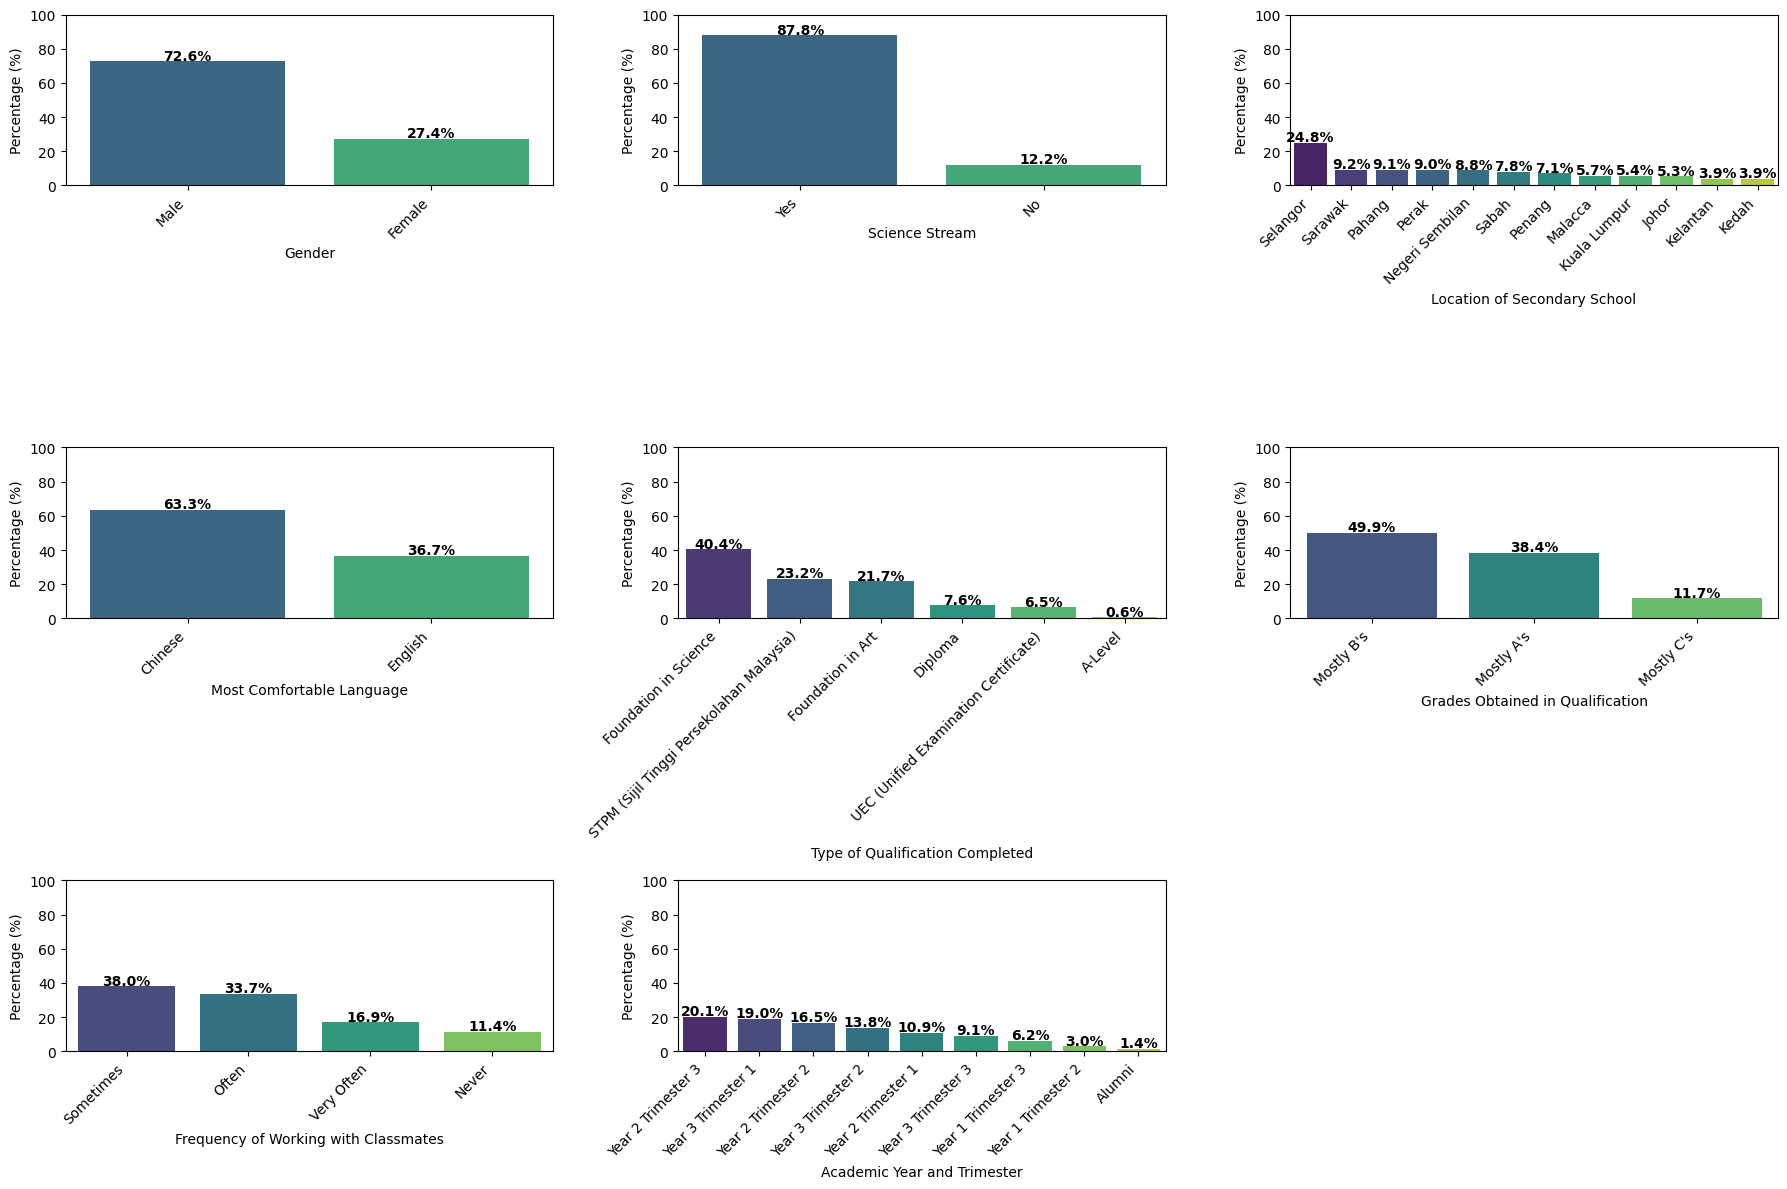

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define relevant categorical columns
categorical_columns = [
    "Gender", "Science Stream", "Location of Secondary School",
    "Most Comfortable Language", "Type of Qualification Completed",
    "Grades Obtained in Qualification", "Frequency of Working with Classmates",
    "Academic Year and Trimester"
]

# Create a grid layout for bar charts
num_cols = 3  # Number of columns per row
num_rows = -(-len(categorical_columns) // num_cols)  # Compute required rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through selected subjects and plot bar charts
for i, col in enumerate(categorical_columns):
    # Compute value counts as percentages
    value_counts = df[col].value_counts(normalize=True) * 100  # Convert to percentage

    # Plot bar chart
    ax = axes[i]
    sns.barplot(
        x=value_counts.index,
        y=value_counts.values,
        ax=ax,
        hue=value_counts.index,
        palette="viridis",
        legend=False
    )

    # Ensure proper tick positions before setting labels
    ax.set_xticks(range(len(value_counts.index)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha="right")  # Fix warning

    # Set y-axis to display percentage
    ax.set_ylabel("Percentage (%)")
    ax.set_ylim(0, 100)  # Ensure the y-axis goes from 0% to 100%

    # Annotate bars with percentage values
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,  # X position (center of bar)
            p.get_height() + 1,  # Y position (slightly above the bar)
            f"{p.get_height():.1f}%",  # Format as 1 decimal place percentage
            ha="center",  # Center align
            fontsize=10,  # Font size
            fontweight="bold",
            color="black"
        )

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Distribution of Subjects

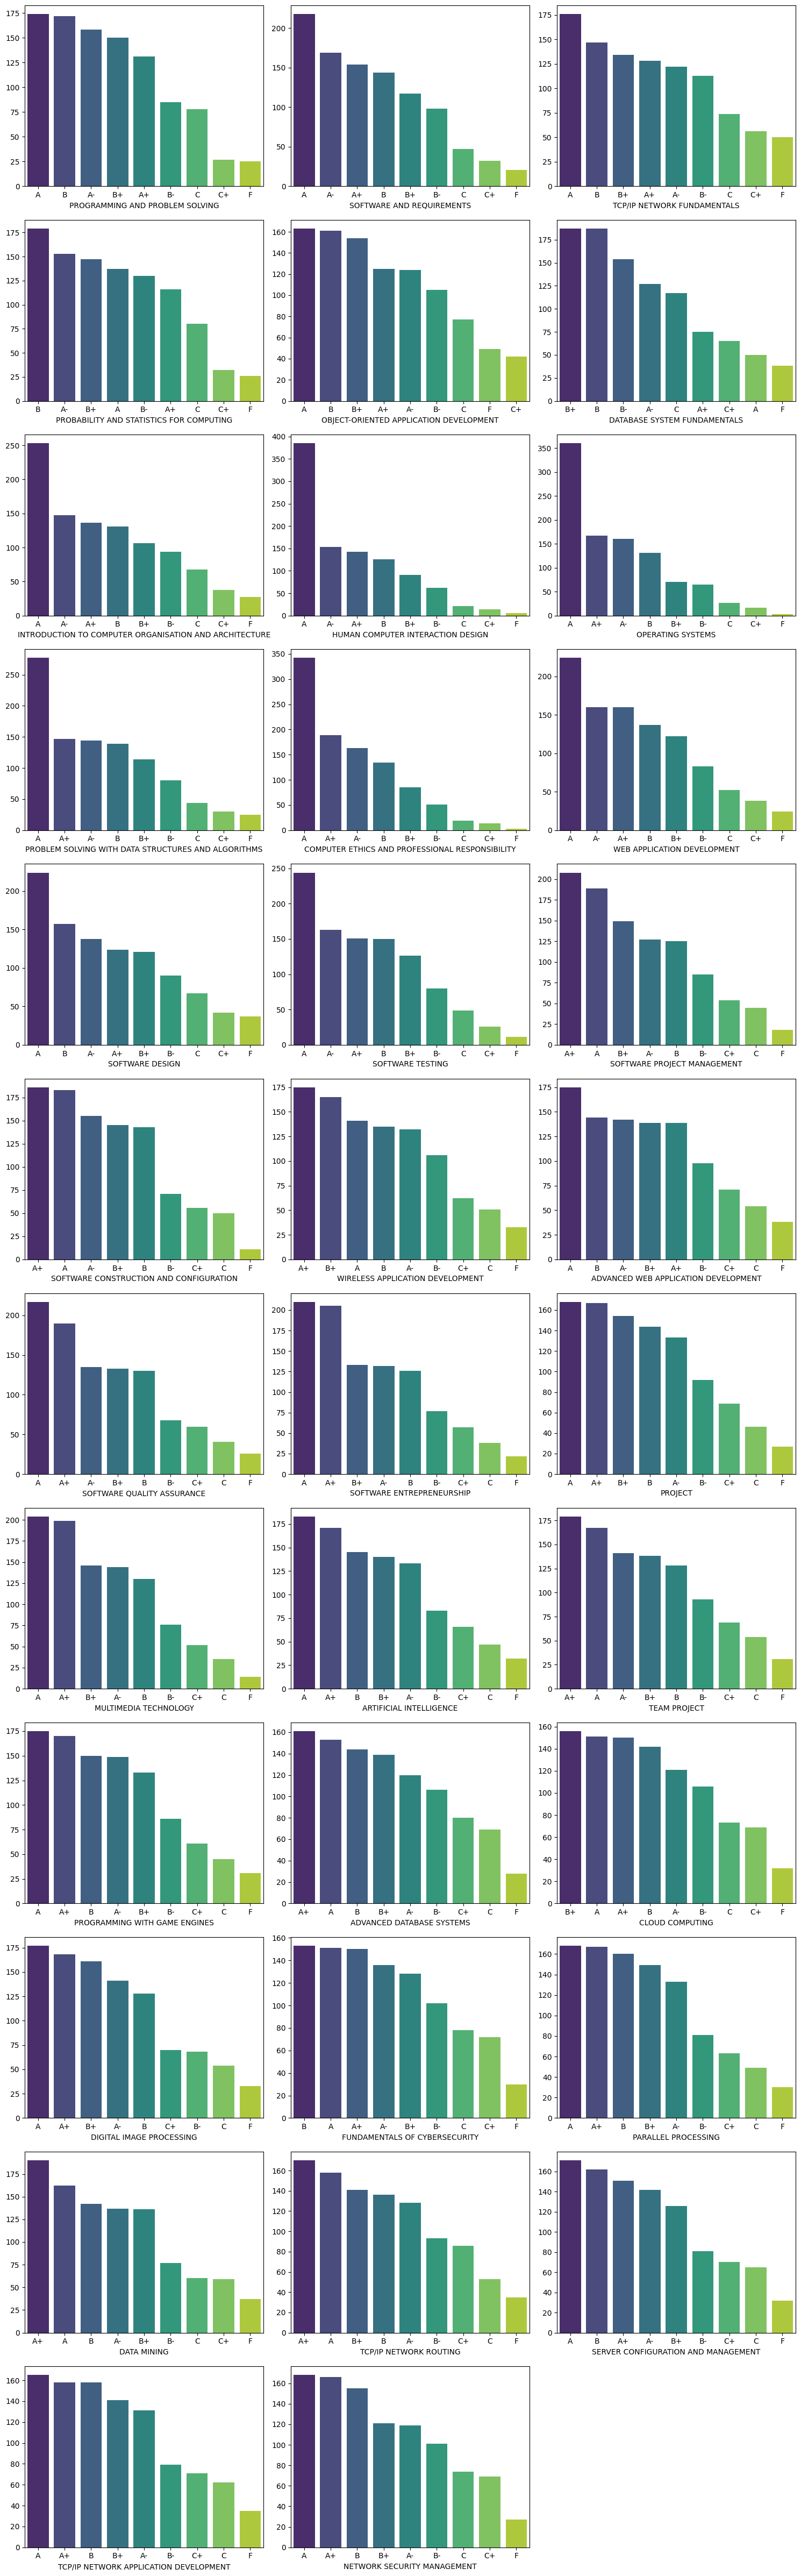

In [ ]:
# List of subjects
subjects = [
    "PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS",
    "TCP/IP NETWORK FUNDAMENTALS", "PROBABILITY AND STATISTICS FOR COMPUTING",
    "OBJECT-ORIENTED APPLICATION DEVELOPMENT", "DATABASE SYSTEM FUNDAMENTALS",
    "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE", "HUMAN COMPUTER INTERACTION DESIGN",
    "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS",
    "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "WEB APPLICATION DEVELOPMENT",
    "SOFTWARE DESIGN", "SOFTWARE TESTING", "SOFTWARE PROJECT MANAGEMENT",
    "SOFTWARE CONSTRUCTION AND CONFIGURATION", "WIRELESS APPLICATION DEVELOPMENT",
    "ADVANCED WEB APPLICATION DEVELOPMENT", "SOFTWARE QUALITY ASSURANCE",
    "SOFTWARE ENTREPRENEURSHIP", "PROJECT", "MULTIMEDIA TECHNOLOGY",
    "ARTIFICIAL INTELLIGENCE", "TEAM PROJECT", "PROGRAMMING WITH GAME ENGINES",
    "ADVANCED DATABASE SYSTEMS", "CLOUD COMPUTING", "DIGITAL IMAGE PROCESSING",
    "FUNDAMENTALS OF CYBERSECURITY", "PARALLEL PROCESSING", "DATA MINING",
    "TCP/IP NETWORK ROUTING", "SERVER CONFIGURATION AND MANAGEMENT",
    "TCP/IP NETWORK APPLICATION DEVELOPMENT", "NETWORK SECURITY MANAGEMENT"
]

# Create a grid layout for bar charts
num_cols = 3  # Number of columns per row
num_rows = -(-len(subjects) // num_cols)  # Compute required rows

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through selected subjects and plot bar charts
for i, col in enumerate(subjects):
  sns.barplot(
      x=df[col].value_counts().index,
      y=df[col].value_counts().values,
      ax=axes[i],
      hue=df[col].value_counts().index,  # Assign hue to x to avoid the warning
      palette="viridis",
      legend=False  # Disable legend
  )

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Correlation of Subjects Grades of Synthetic Data

In [ ]:
subjects = ["PROGRAMMING AND PROBLEM SOLVING", "SOFTWARE AND REQUIREMENTS", "TCP/IP NETWORK FUNDAMENTALS",
            "PROBABILITY AND STATISTICS FOR COMPUTING", "OBJECT-ORIENTED APPLICATION DEVELOPMENT",
            "DATABASE SYSTEM FUNDAMENTALS", "WEB APPLICATION DEVELOPMENT", "SOFTWARE DESIGN", "SOFTWARE TESTING",
            "COMPUTER ETHICS AND PROFESSIONAL RESPONSIBILITY", "INTRODUCTION TO COMPUTER ORGANISATION AND ARCHITECTURE",
            "HUMAN COMPUTER INTERACTION DESIGN", "OPERATING SYSTEMS", "PROBLEM SOLVING WITH DATA STRUCTURES AND ALGORITHMS"]

df_subjects = df[subjects]

# Convert grades to numeric (e.g., A=4, B=3, C=2, D=1, F=0)
grade_mapping = {'A': 3, 'B': 2, 'C': 1, 'F': 0}
df_numeric = df_subjects.map(lambda x: grade_mapping.get(x, None))

# Apply KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_subjects.columns)

# Convert back to letter grades
reverse_mapping = {v: k for k, v in grade_mapping.items()}
df_subjects = df_imputed.map(lambda x: reverse_mapping.get(round(x), 'C'))  # Default to 'C' if rounding error

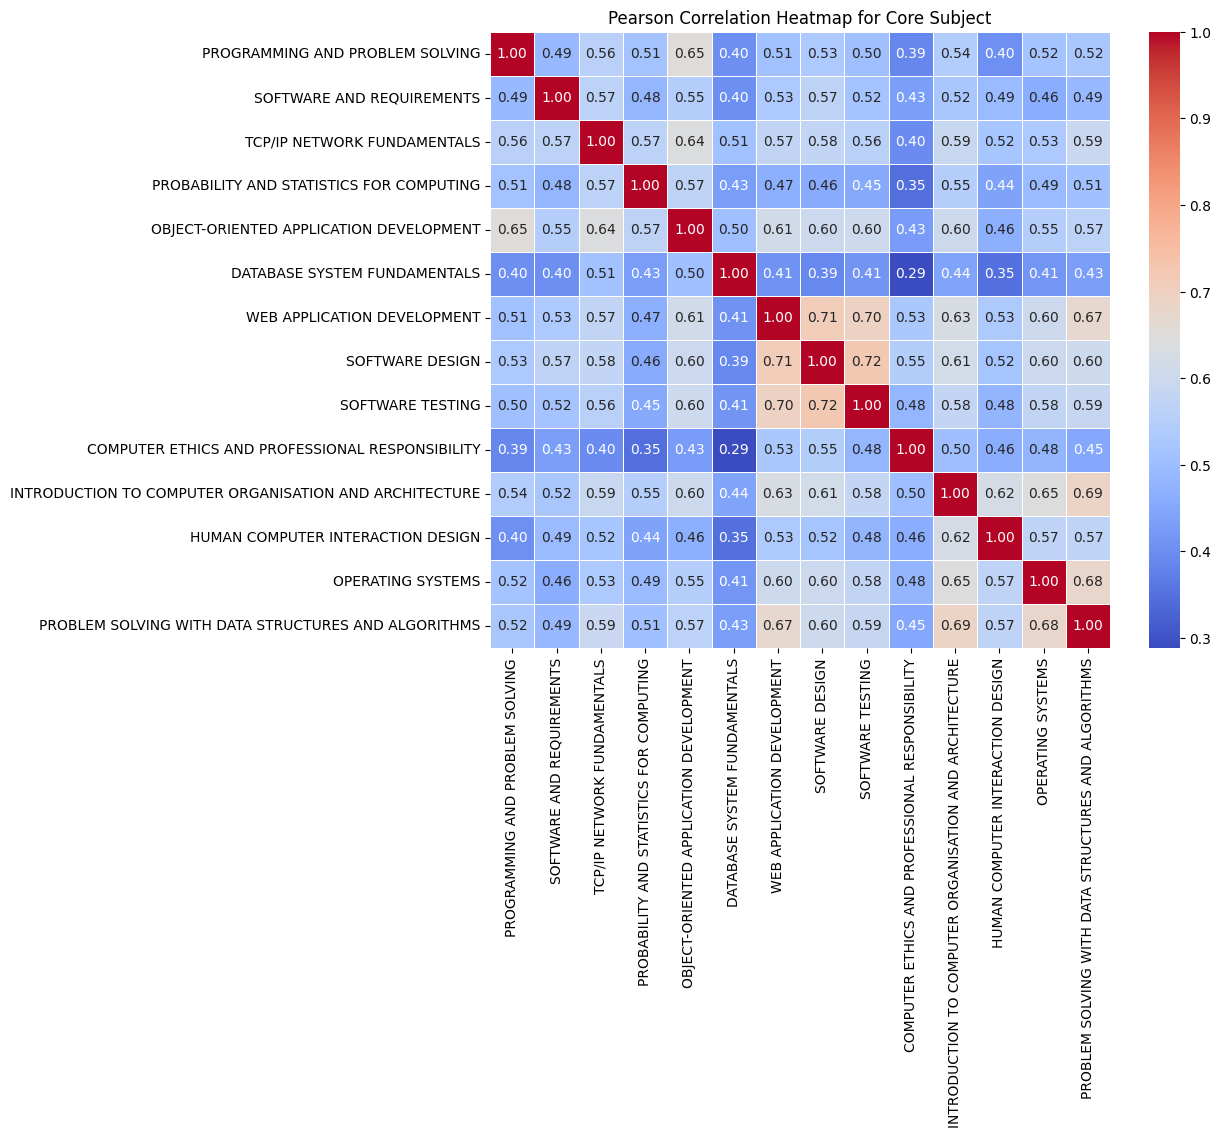

In [ ]:
# Step 1: Encode Categorical Data
df_encoded = df_subjects[subjects].copy()

# Use Label Encoding for all categorical columns
categorical_columns = df_encoded.select_dtypes(include=['object']).columns  # Select categorical columns
for col in categorical_columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes  # Convert to numerical codes

# Step 2: Compute Pearson Correlation
corr_matrix = df_encoded.corr(method='pearson')  # Compute correlation

# Step 3: Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Pearson Correlation Heatmap for Core Subject")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Columns of interest
# columns = ["Gender", "Most Comfortable Language", "Location of Secondary School",
#            "Science Stream", "Type of Qualification Completed", "Grades Obtained in Qualification",
#            "Frequency of Working with Classmates", "Academic Year and Trimester", "Year of Birth",
#            "English Proficiency", "Interest in Studying Computer", "Average Studying Hours per Week", "ADVANCED WEB APPLICATION DEVELOPMENT"]

# Filter and clean
df_numeric = df.copy()
grade_mapping = {
    'A+': 8, 'A': 7, 'A-': 6,
    'B+': 5, 'B': 4, 'B-': 3,
    'C+': 2, 'C': 1, 'F': 0
}

for col in df_numeric.columns:
    df_numeric[col] = df_numeric[col].replace(grade_mapping)

df_numeric = df_numeric.dropna(subset=["ADVANCED WEB APPLICATION DEVELOPMENT"])

# Encode categorical features using LabelEncoder
label_encoders = {}
for col in df_numeric.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df_numeric[col] = le.fit_transform(df_numeric[col].astype(str))
    label_encoders[col] = le  # Save encoders if needed later

# Separate features and target
X = df_numeric.drop(columns=["ADVANCED WEB APPLICATION DEVELOPMENT"])
y = df_numeric["ADVANCED WEB APPLICATION DEVELOPMENT"]

# Identify numeric columns (all should now be numeric)
numerical_cols = X.columns.tolist()

# Preprocessing and model pipeline
model = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = model.named_steps["classifier"].feature_importances_
importance_df = pd.DataFrame({
    "Feature": numerical_cols,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df.head(15)

<ipython-input-36-7713ff2734ac>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numeric[col] = df_numeric[col].replace(grade_mapping)


,Feature,Importance
12,CGPA,0.053896
11,Average Studying Hours per Week,0.033642
13,PROGRAMMING AND PROBLEM SOLVING,0.029151
15,TCP/IP NETWORK FUNDAMENTALS,0.028129
32,PROJECT,0.025356
17,OBJECT-ORIENTED APPLICATION DEVELOPMENT,0.025275
39,DIGITAL IMAGE PROCESSING,0.024869
43,TCP/IP NETWORK ROUTING,0.024326
2,Location of Secondary School,0.024243
44,SERVER CONFIGURATION AND MANAGEMENT,0.024181


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Filter and clean
df_numeric = df.copy()
grade_mapping = {
    'A+': 8, 'A': 7, 'A-': 6,
    'B+': 5, 'B': 4, 'B-': 3,
    'C+': 2, 'C': 1, 'F': 0
}

for col in df_numeric.columns:
    df_numeric[col] = df_numeric[col].replace(grade_mapping)

df_numeric = df_numeric.dropna(subset=["PROGRAMMING AND PROBLEM SOLVING"])

# Encode categorical features using LabelEncoder
label_encoders = {}
for col in df_numeric.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df_numeric[col] = le.fit_transform(df_numeric[col].astype(str))
    label_encoders[col] = le  # Save encoders if needed later

# Separate features and target
X = df_numeric.drop(columns=["PROGRAMMING AND PROBLEM SOLVING"])
y = df_numeric["PROGRAMMING AND PROBLEM SOLVING"]

# Identify numeric columns (all should now be numeric)
numerical_cols = X.columns.tolist()

# Preprocessing and model pipeline
model = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = model.named_steps["classifier"].feature_importances_
importance_df = pd.DataFrame({
    "Feature": numerical_cols,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df.head(15)

<ipython-input-37-4d3459d2c6d7>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numeric[col] = df_numeric[col].replace(grade_mapping)


,Feature,Importance
12,CGPA,0.066128
16,OBJECT-ORIENTED APPLICATION DEVELOPMENT,0.033479
40,FUNDAMENTALS OF CYBERSECURITY,0.032896
37,ADVANCED DATABASE SYSTEMS,0.027995
42,DATA MINING,0.027904
11,Average Studying Hours per Week,0.027415
39,DIGITAL IMAGE PROCESSING,0.027373
41,PARALLEL PROCESSING,0.027301
29,ADVANCED WEB APPLICATION DEVELOPMENT,0.027208
34,ARTIFICIAL INTELLIGENCE,0.025759


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Mapping of letter grades to GPA-like scores
grade_mapping = {
    'A+': 4.3, 'A': 4.0, 'A-': 3.7,
    'B+': 3.3, 'B': 3.0, 'B-': 2.7,
    'C+': 2.3, 'C': 2.0, 'C-': 1.7,
    'D+': 1.3, 'D': 1.0, 'F': 0.0
}

# Replace letter grades with numerical values
df_numeric = df.copy()
for col in df.columns:
    df_numeric[col] = df_numeric[col].replace(grade_mapping)

# Drop rows with missing CGPA
df_numeric = df_numeric.dropna(subset=["CGPA"])

# Separate features and target
X = df_numeric.drop(columns=["CGPA"])
y = df_numeric["CGPA"]

# Identify categorical columns for encoding
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="mean"), numerical_cols),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), categorical_cols)
    ]
)

# Define the model pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Extract feature importances
feature_names_num = numerical_cols
feature_names_cat = model.named_steps["preprocessor"].transformers_[1][1].named_steps["onehot"].get_feature_names_out(categorical_cols)
feature_names = np.concatenate([feature_names_num, feature_names_cat])
importances = model.named_steps["regressor"].feature_importances_

# Create a DataFrame for easier viewing
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df.head(15)

<ipython-input-38-fe1d576e7ce7>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numeric[col] = df_numeric[col].replace(grade_mapping)


,Feature,Importance
8,OBJECT-ORIENTED APPLICATION DEVELOPMENT,0.503538
10,WEB APPLICATION DEVELOPMENT,0.163209
4,PROGRAMMING AND PROBLEM SOLVING,0.050778
16,OPERATING SYSTEMS,0.043627
6,TCP/IP NETWORK FUNDAMENTALS,0.034819
17,PROBLEM SOLVING WITH DATA STRUCTURES AND ALGOR...,0.031466
5,SOFTWARE AND REQUIREMENTS,0.019396
11,SOFTWARE DESIGN,0.015011
24,PROJECT,0.014440
14,INTRODUCTION TO COMPUTER ORGANISATION AND ARCH...,0.010599


In [ ]:
df_dir = "/content/training-data-1000.csv"
df = pd.read_csv(df_dir)

df_numeric = df.copy()
grade_mapping = {
    'A+': 8, 'A': 7, 'A-': 6,
    'B+': 5, 'B': 4, 'B-': 3,
    'C+': 2, 'C': 1, 'F': 0
}

for col in df_numeric.columns:
    df_numeric[col] = df_numeric[col].replace(grade_mapping)

df_numeric = df_numeric.dropna(subset=[subject])

# Encode categorical features using LabelEncoder
label_encoders = {}
for col in df_numeric.select_dtypes(include="object").columns:
    le = LabelEncoder()
    df_numeric[col] = le.fit_transform(df_numeric[col].astype(str))
    label_encoders[col] = le  # Save encoders if needed later

# Separate features and target
X = df_numeric.drop(columns=[subject])
y = df_numeric[subject]

# Identify numeric columns (all should now be numeric)
numerical_cols = X.columns.tolist()

# Preprocessing and model pipeline
model = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = model.named_steps["classifier"].feature_importances_
importance_df = pd.DataFrame({
    "Feature": numerical_cols,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df.head(15)